# Cell Types Project
### Exploring L4 & L5 Neuronal Dynamics in Epilepsy of Mouse vs. Human Specimens

## Team Member Names & Contributions
### Epic Neuronerds

- **Ber Al Jaibaji A16810381**:
- **Elizaveta Beltyukova**: 
- **Doris Tian**:

## Abstract

## Research Question

#### How do Layer 4 (L4) and Layer 5 (L5) neurons differ in their electrophysiological properties and gene expression profiles in epileptic versus non-epileptic conditions across mice vs. human groups?

# Background and Prior Work

Epilepsy is a prevalent neuro-disorder that is characterized by recurrent episodes of seizure. This is a rather established field with the common understanding of the cause being the imbalance between excitatory neuron activation and inhibitory neuron insufficiency. Epileptogenesis is associated with complex and multiple risk factors. Previous results show the upregulation of risk genes encoding ion channels, which is closely related to neuronal firing, neuron excitation, and potential loss of inhibition. This shows the significance of investigating the difference in electrophysiology data and the transcriptomics that is relevant to epilepsy. A study by Ulrich Pfisterer et al. analyzed the gene expression of the output layer L5, and concluded the upregulation of genes encoding glutamate receptor subunits e.g. GRIA1 ,AMPA Receptor e.g. CKAMP44, and voltage-gated ion channels e.g. SCN1A. Therefore, we first aim to utilize a new data modality to validate and illustrate the genetic data and also expand on the electrophysiology data on L5 according to epilepsy. 
 
Furthermore, Another study (Bod R) shows that L4, the granular layer of the cortex is also potentially related to epileptic hyperexcitation, which however the previous study by Ulrich Pfisterer didn’t address. Therefore, we decide to incorporate electrophysiology and transcriptome data to investigate the role of L4 neurons in epilepsy. To validate the result, we also aim to compare the difference in transcriptome between excitatory and inhibitory neurons to show whether this imbalance dynamic is genetically related.
 
The first data modality we incorporate to address the question is Allen Brain Atlas - Cell Type Database contains RNA sequencing and electrophysiology of L4 and L5 which allows analysis of the transcriptome in those cell types. Additionally, Temple University EEG Seizure Corpus (TUH EEG) contains EEG signals from epileptic and non-epileptic patients, which allows the comparison of seizure episodes with electrophysiology data to baseline. By wrangling and visualizing the datasets mentioned, we aim to investigate the difference in electrophysiology and transcriptome of L4 and L5 neurons between epileptic and non-epileptic individuals.


### References (include links):
(1)

(2)

## Hypothesis


In epilepsy, Layer 5 (L5) pyramidal neurons exhibit greater hyperexcitability and altered gene expression compared to Layer 4 (L4) neurons, contributing more significantly to seizure propagation. We expect L5 neurons to show increased firing rates, prolonged action potentials, and upregulated excitatory ion channel genes (SCN1A, SCN8A), while L4 neurons may exhibit milder excitability changes. Additionally, we hypothesize that these differences vary across age groups, with younger brains showing distinct gene expression patterns compared to adults.

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [25]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm

## Data Wrangling

Describe your data wrangling steps here.

In [26]:
file_path = "/home/bmaljaibaji/cell_types_specimen_details_mouse.csv"
expression_df = pd.read_csv("/home/bmaljaibaji/Expression.csv")
columns_df = pd.read_csv("/home/bmaljaibaji/Columns.csv")
probes_df = pd.read_csv("/home/bmaljaibaji/Probes.csv")


data = pd.read_csv(file_path)


print(f"Dataset Shape: {data.shape}")
print("Available Columns:", data.columns)

# Filter for Layer 4 (L4) and Layer 5 (L5)
l4_data = data[data['structure__layer'] == '4']
l5_data = data[data['structure__layer'] == '5']

# Separate human and mouse data
human_L4 = l4_data[l4_data['donor__species'] == 'Homo Sapiens']
human_L5 = l5_data[l5_data['donor__species'] == 'Homo Sapiens']
mouse_L4 = l4_data[l4_data['donor__species'] == 'Mus musculus']
mouse_L5 = l5_data[l5_data['donor__species'] == 'Mus musculus']

ephys_columns = [
    'nr__max_euclidean_distance', 'nr__number_stems', 'nr__number_bifurcations',
    'nr__average_contraction', 'nr__average_parent_daughter_ratio', 'ef__fast_trough_v_long_square',
    'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation', 'ef__f_i_curve_slope',
    'ef__threshold_i_long_square', 'ef__tau', 'ef__avg_isi', 'ef__avg_firing_rate',
    'ef__ri', 'ef__peak_t_ramp', 'ef__vrest'
]


ephys_columns_filtered = [col for col in ephys_columns if col in data.columns]


human_L4_ephys = human_L4[ephys_columns_filtered].dropna()
human_L5_ephys = human_L5[ephys_columns_filtered].dropna()
mouse_L4_ephys = mouse_L4[ephys_columns_filtered].dropna()
mouse_L5_ephys = mouse_L5[ephys_columns_filtered].dropna()


def compute_stats(data):
    if data.empty:
        return np.full((8, len(ephys_columns_filtered)), np.nan)
    
    return np.array([
        np.count_nonzero(~np.isnan(data), axis=0),
        np.nanmean(data, axis=0),
        np.nanstd(data, axis=0),
        np.nanmin(data, axis=0),
        np.nanpercentile(data, 25, axis=0),
        np.nanpercentile(data, 50, axis=0),
        np.nanpercentile(data, 75, axis=0),
        np.nanmax(data, axis=0)
    ])


human_L4_stats = compute_stats(human_L4_ephys)
human_L5_stats = compute_stats(human_L5_ephys)
mouse_L4_stats = compute_stats(mouse_L4_ephys)
mouse_L5_stats = compute_stats(mouse_L5_ephys)


stats_labels = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']


human_L4_stats_df = pd.DataFrame(human_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
human_L5_stats_df = pd.DataFrame(human_L5_stats, index=stats_labels, columns=ephys_columns_filtered)
mouse_L4_stats_df = pd.DataFrame(mouse_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
mouse_L5_stats_df = pd.DataFrame(mouse_L5_stats, index=stats_labels, columns=ephys_columns_filtered)


print("\nHuman Layer 4 (L4) Neuron Statistics:")
display(human_L4_stats_df)

print("\nHuman Layer 5 (L5) Neuron Statistics:")
display(human_L5_stats_df)

print("\nMouse Layer 4 (L4) Neuron Statistics:")
display(mouse_L4_stats_df)

print("\nMouse Layer 5 (L5) Neuron Statistics:")
display(mouse_L5_stats_df)

Dataset Shape: (2333, 54)
Available Columns: Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendr

,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
Mean,604.117953,4.466667,19.600000,0.858872,0.958022,-54.918753,2.834585,0.067718,0.252395,67.333333,23.921154,68.867921,26.954083,226.492597,4.365693,-68.259888
Std,225.912188,0.884433,4.572381,0.029423,0.037080,5.241596,0.861075,0.055768,0.107755,44.342104,9.560321,36.756365,39.498041,98.753088,3.125493,3.404470
Min,288.950400,3.000000,11.000000,0.817892,0.903433,-65.406258,1.452890,0.006228,0.014894,30.000000,7.177321,5.800000,6.932729,65.781251,1.916387,-74.260269
25%,399.501150,4.000000,16.500000,0.833241,0.926314,-55.109377,2.349914,0.024586,0.170868,50.000000,18.268624,47.941479,11.597113,169.218823,2.999253,-71.281368
50%,610.174005,4.000000,21.000000,0.850827,0.958235,-53.281250,2.643522,0.055946,0.279016,50.000000,26.231871,58.747500,17.022001,221.406132,3.284380,-68.179855
75%,787.804729,5.000000,23.500000,0.888788,1.000000,-52.000004,3.245118,0.082007,0.325193,70.000000,30.568312,87.073182,20.908558,283.515647,4.657842,-65.513210
Max,962.801000,6.000000,26.000000,0.900537,1.000000,-46.687504,4.722566,0.196552,0.421007,210.000000,38.929509,144.243333,172.413793,438.750058,14.666587,-62.545727



Human Layer 5 (L5) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
Mean,693.224077,5.260870,24.608696,0.859440,0.967762,-53.711959,3.242476,0.210082,0.181816,85.217391,29.253095,129.765656,11.261298,166.699373,4.828734,-67.889446
Std,368.249924,1.223587,9.267705,0.043312,0.035096,4.562778,0.822851,0.274081,0.105199,46.050026,11.391213,83.338235,7.241966,68.147189,2.001067,4.203792
Min,233.982835,3.000000,10.000000,0.764709,0.889893,-65.031250,1.364448,0.002328,0.052000,20.000000,7.919526,34.261429,2.712526,63.281059,1.679947,-73.533676
25%,379.912634,4.500000,17.500000,0.834835,0.944706,-54.625002,2.822903,0.026277,0.106868,55.000000,23.022232,79.967500,6.155443,117.968764,3.323193,-71.293446
50%,597.041285,5.000000,25.000000,0.867519,0.979105,-53.031250,3.378514,0.064593,0.152611,70.000000,28.297061,107.275000,9.321836,173.437878,4.218187,-67.873535
75%,967.710429,6.000000,29.500000,0.889841,0.997535,-51.421879,3.813140,0.318103,0.197230,105.000000,35.980225,163.805000,12.526835,202.656247,6.187897,-65.054451
Max,1623.575309,8.000000,49.000000,0.925520,1.000000,-45.656254,4.559643,0.975859,0.483584,210.000000,50.025055,368.660000,29.187341,353.705466,8.867207,-59.723316



Mouse Layer 4 (L4) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
Mean,369.826491,6.585586,26.792793,0.893386,0.895087,-49.542232,3.066116,0.065348,0.267332,118.378378,20.196505,75.926674,21.161098,176.138071,5.061347,-73.258452
Std,105.317389,2.162200,9.161334,0.025669,0.079348,5.516583,0.946637,0.101986,0.245406,74.405034,6.813748,38.960508,22.087936,60.062954,2.420808,5.346626
Min,98.478472,2.000000,5.000000,0.802906,0.710497,-65.781250,1.014310,-0.077545,0.001625,29.999998,4.587860,8.440342,5.006258,52.343789,1.712613,-85.157074
25%,310.140044,5.000000,21.000000,0.879233,0.847296,-51.828127,2.635942,0.017613,0.149436,70.000000,16.130747,55.463824,10.560287,136.093751,3.567592,-76.930595
50%,391.890547,7.000000,26.000000,0.898795,0.896965,-48.375000,3.266753,0.032048,0.192937,90.000000,20.758063,74.015833,13.510623,171.562538,4.505257,-73.193077
75%,448.325389,8.000000,33.000000,0.911548,0.964303,-45.921877,3.685384,0.070714,0.253094,150.000000,24.852175,94.694722,18.032640,212.500095,5.719072,-70.235653
Max,547.668607,12.000000,51.000000,0.939655,1.122363,-38.187500,5.261166,0.668475,1.740972,420.000000,35.841292,199.750000,118.478613,362.500340,15.139840,-59.644447



Mouse Layer 5 (L5) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
Mean,401.613572,6.875000,28.926471,0.886256,0.910625,-52.626611,2.553022,0.059336,0.391925,143.382352,20.817865,71.825004,30.909186,186.431426,6.290462,-71.749878
Std,176.612190,2.244069,15.226058,0.033754,0.072136,7.320050,1.012148,0.083869,0.421028,110.468390,12.021113,51.569286,37.663976,106.775521,4.153224,5.095490
Min,110.448307,2.000000,6.000000,0.656121,0.710068,-75.312500,1.018393,-0.204913,0.026058,10.000000,5.033383,3.828333,3.231644,47.656059,1.306810,-82.914177
25%,239.254335,5.000000,17.000000,0.875126,0.845166,-58.515626,1.604563,0.008454,0.142653,57.500000,13.389870,31.314177,9.911866,107.148377,3.231880,-75.137718
50%,363.233284,7.000000,24.000000,0.892055,0.907311,-52.046879,2.560103,0.031588,0.202055,110.000000,18.181504,62.481167,16.005219,148.906283,4.923904,-72.160694
75%,581.573620,8.000000,39.000000,0.908012,0.977701,-46.484375,3.281778,0.079945,0.449281,190.000000,26.135717,100.889375,31.938057,233.593818,7.667522,-68.161968
Max,701.839455,14.000000,79.000000,0.930815,1.083109,-38.687500,5.211223,0.419446,2.630001,570.000000,74.898731,309.440000,261.210274,567.968786,20.853427,-58.316341


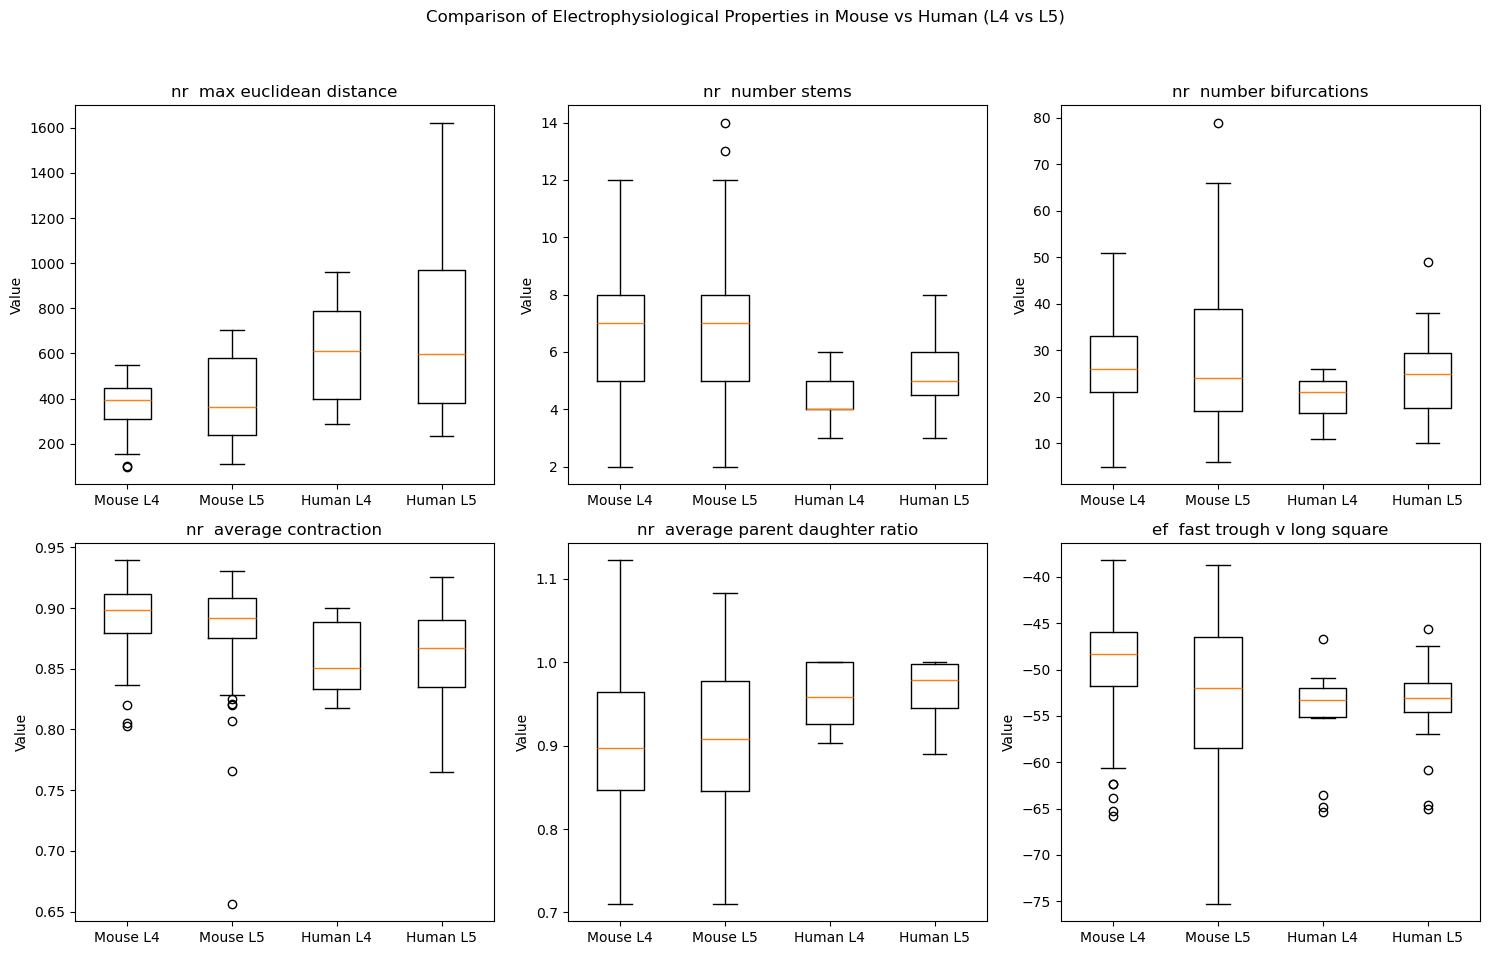

In [27]:
# Create a box plot comparing L4 and L5 between mouse and human
plt.figure(figsize=(15, 10))

for i, col in enumerate(ephys_columns_filtered[:6]):  # Plot first 6 features for clarity
    plt.subplot(2, 3, i + 1)
    plt.boxplot([
        mouse_L4_ephys[col].dropna(), 
        mouse_L5_ephys[col].dropna(),
        human_L4_ephys[col].dropna(), 
        human_L5_ephys[col].dropna()
    ], labels=['Mouse L4', 'Mouse L5', 'Human L4', 'Human L5'])
    
    plt.title(col.replace('_', ' '))
    plt.ylabel('Value')

plt.suptitle("Comparison of Electrophysiological Properties in Mouse vs Human (L4 vs L5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


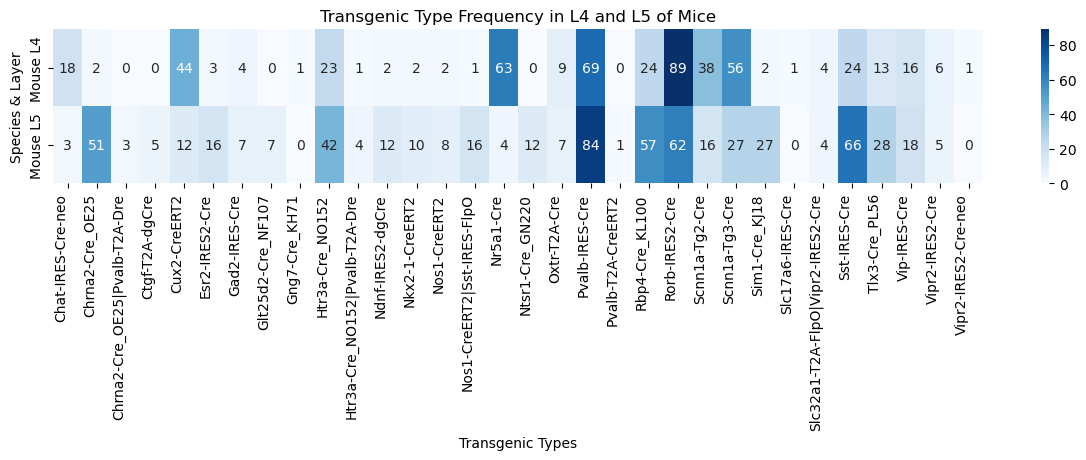

In [28]:
l4_l5_gene_counts = pd.concat([
    mouse_L4[['line_name']].assign(Species_Layer='Mouse L4'),
    mouse_L5[['line_name']].assign(Species_Layer='Mouse L5')
])


l4_l5_gene_counts = l4_l5_gene_counts.dropna()
gene_frequencies = l4_l5_gene_counts.groupby(['Species_Layer', 'line_name']).size().unstack(fill_value=0)


plt.figure(figsize=(15, 2))
sns.heatmap(gene_frequencies, annot=True, cmap="Blues", fmt="d")

plt.title("Transgenic Type Frequency in L4 and L5 of Mice")
plt.xlabel("Transgenic Types")
plt.ylabel("Species & Layer")
plt.xticks(rotation=90, ha="right")

plt.show()


## Data Analysis & Results

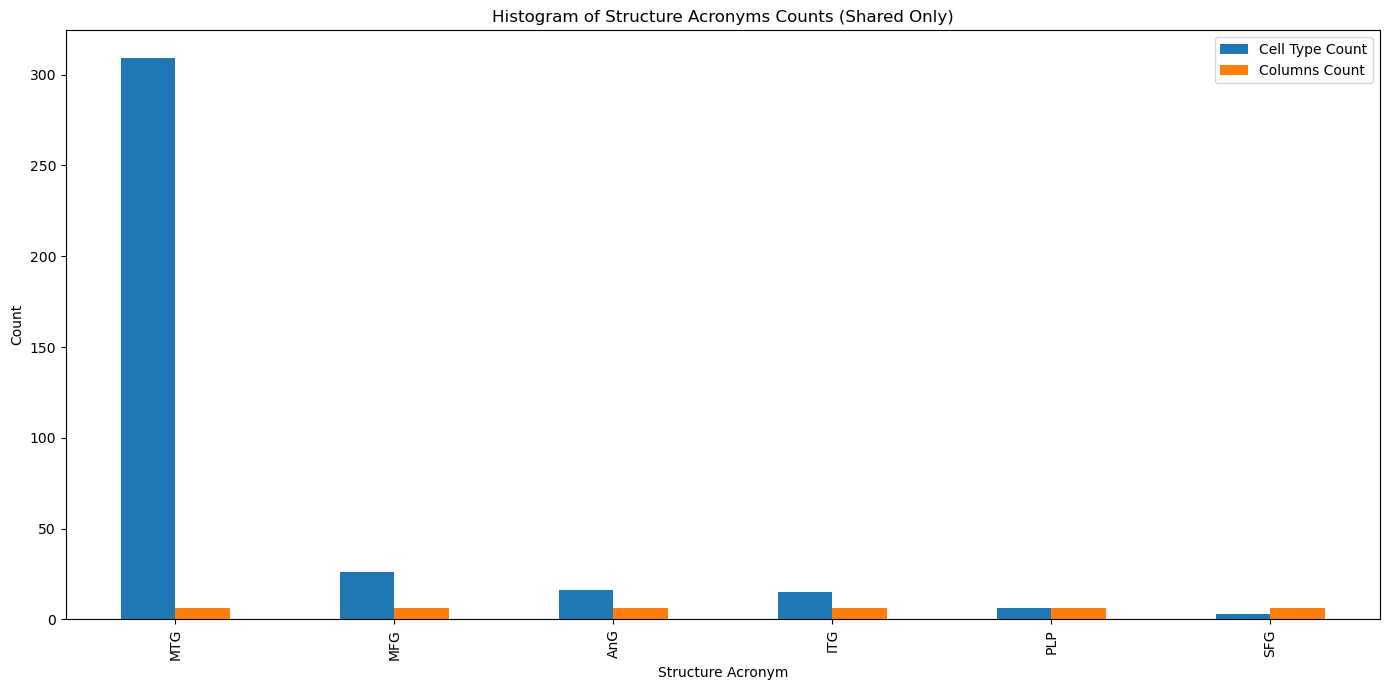

In [29]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Combine both counts into a dictionary
acronym_counts = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_counts[acronym] = {
            "Cell Type Count": cell_count,
            "Columns Count": column_count
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_counts, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Count", "Columns Count"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Count", "Columns Count"], ascending=False)

# Plot histograms
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Count", "Columns Count"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Count")
plt.title("Histogram of Structure Acronyms Counts (Shared Only)")
plt.xticks(rotation=90)
plt.legend(["Cell Type Count", "Columns Count"])
plt.tight_layout()
plt.show()




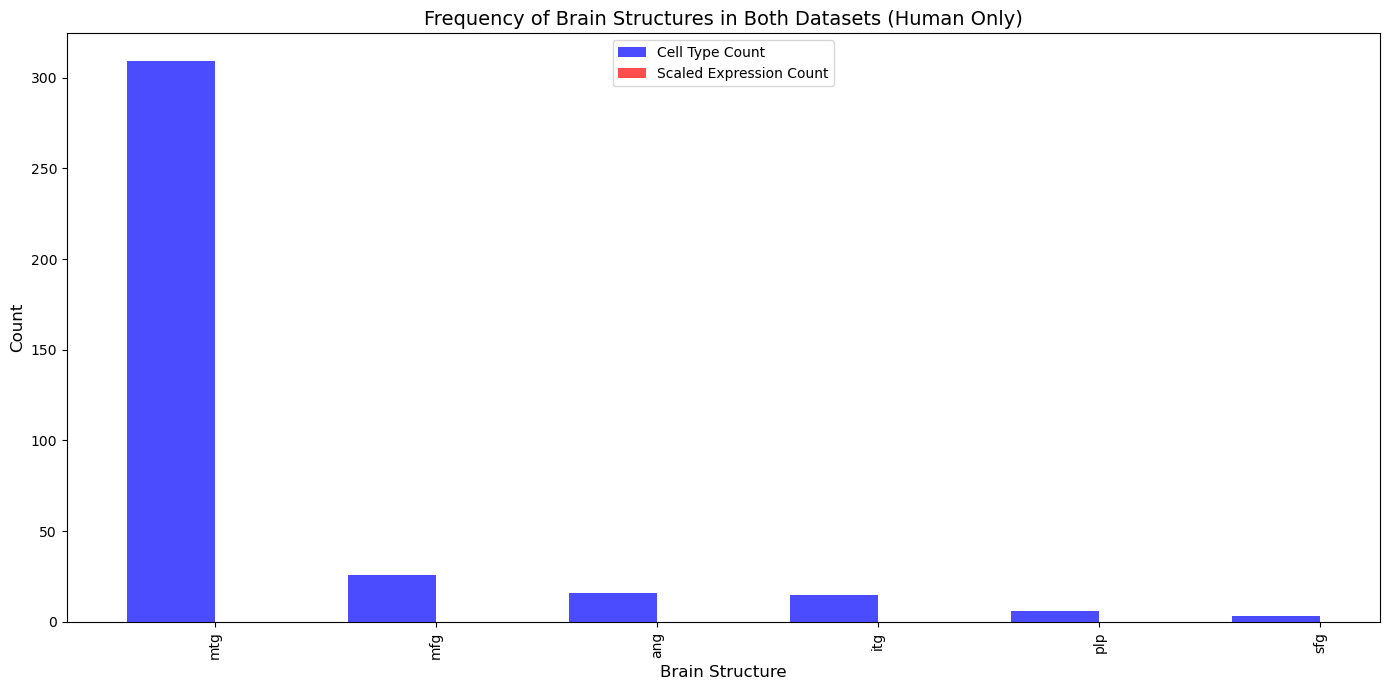

In [30]:

data = data[data["donor__species"] == "Homo Sapiens"]

# Use structure acronyms for better matching
data["structure_name"] = data["structure__acronym"].str.strip().str.lower()
columns_df["structure_name"] = columns_df["structure_abbreviation"].str.strip().str.lower()

# Count occurrences of each brain structure in both datasets
structure_counts_data = data["structure_name"].value_counts().reset_index()
structure_counts_data.columns = ["Brain Structure", "Cell Type Count"]

structure_counts_columns = columns_df["structure_name"].value_counts().reset_index()
structure_counts_columns.columns = ["Brain Structure", "Expression Count"]

# Merge counts into a single dataframe, keeping only matching structures
merged_counts = structure_counts_data.merge(structure_counts_columns, on="Brain Structure", how="inner")

# Sort by frequency for better visualization
merged_counts = merged_counts.sort_values(by=["Cell Type Count", "Expression Count"], ascending=False)

# Normalize expression counts using Min-Max normalization
min_expr = merged_counts["Expression Count"].min()
max_expr = merged_counts["Expression Count"].max()
merged_counts["Expression Count"] = (merged_counts["Expression Count"] - min_expr) / (max_expr - min_expr) * merged_counts["Cell Type Count"].max()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(merged_counts))  # Label locations
width = 0.4  # Width of the bars

ax.bar(x - width/2, merged_counts["Cell Type Count"], width, color="blue", alpha=0.7, label="Cell Type Count")
ax.bar(x + width/2, merged_counts["Expression Count"], width, color="red", alpha=0.7, label="Scaled Expression Count")

ax.set_xticks(x)
ax.set_xticklabels(merged_counts["Brain Structure"], rotation=90)
plt.xlabel("Brain Structure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Frequency of Brain Structures in Both Datasets (Human Only)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Include cells that describe the steps in your data analysis.

,Structure Acronym,Cell Type Frequency,Columns Frequency
4,MTG,0.748184,0.005917
5,MFG,0.062954,0.005917
2,AnG,0.038741,0.005917
3,ITG,0.036320,0.005917
0,PLP,0.014528,0.005917
1,SFG,0.007264,0.005917


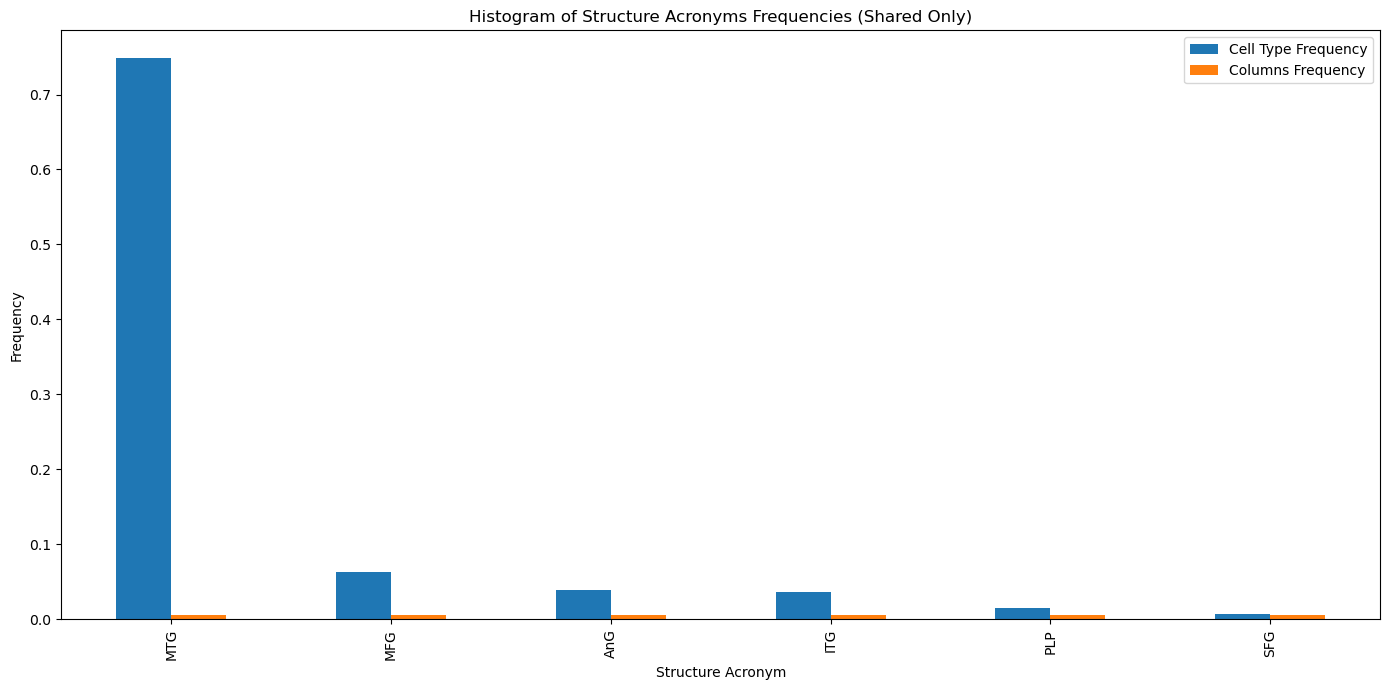

In [32]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Calculate total structure counts
total_cell_types = sum(cell_type_counts.values())
total_columns = sum(columns_counts.values())

# Combine both counts into a frequency dictionary
acronym_frequencies = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_frequencies[acronym] = {
            "Cell Type Frequency": cell_count / total_cell_types,
            "Columns Frequency": column_count / total_columns
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_frequencies, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Frequency", "Columns Frequency"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Frequency", "Columns Frequency"], ascending=False)

# Display the frequencies as a table
from IPython.display import display

display(acronym_df)

# Plot frequency histogram
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Frequency", "Columns Frequency"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Frequency")
plt.title("Histogram of Structure Acronyms Frequencies (Shared Only)")
plt.xticks(rotation=90)
plt.legend(["Cell Type Frequency", "Columns Frequency"])
plt.tight_layout()
plt.show()


,structure_abbreviation,Expression


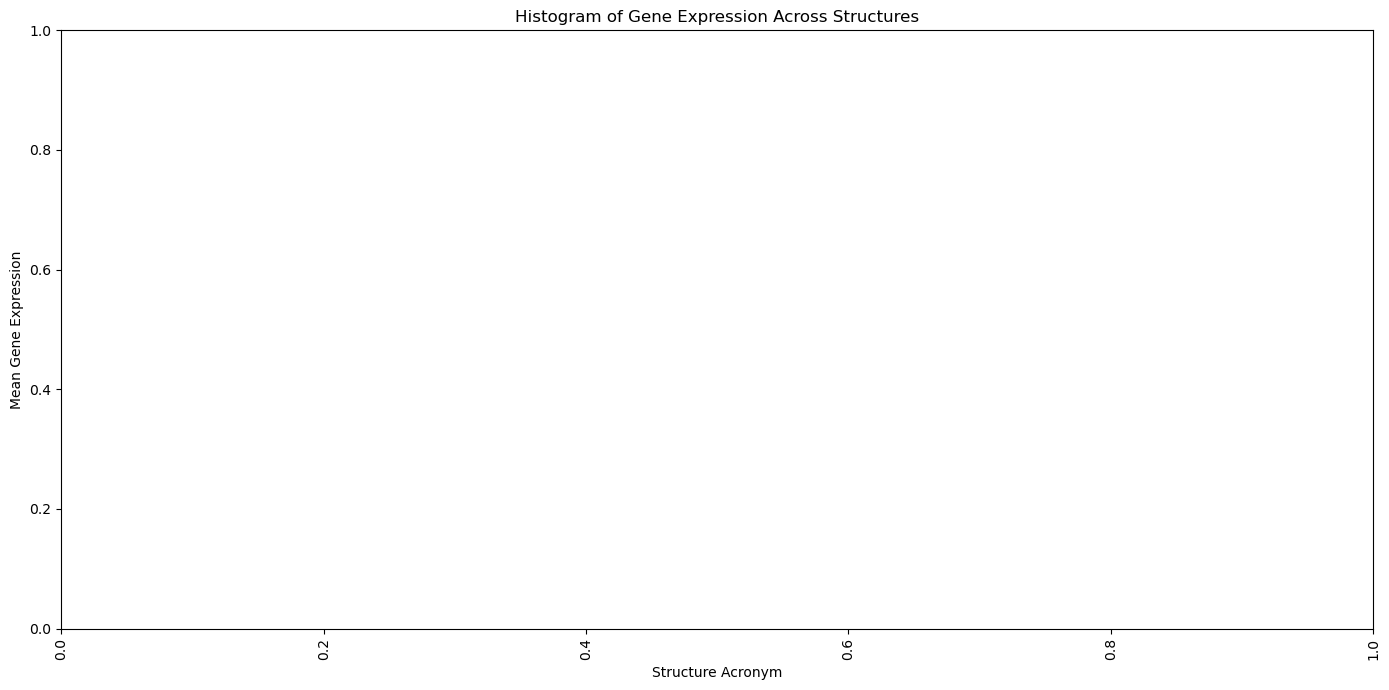

In [36]:
# Merge expression data with column metadata
columns_filtered = columns_df[['structure_id', 'structure_abbreviation']].drop_duplicates()
expression_melted = expression_df.melt(id_vars=expression_df.columns[0], var_name="Sample", value_name="Expression")
columns_df["Sample"] = columns_df.index.astype(str)
expression_merged = expression_melted.merge(columns_df, on="Sample")
expression_summary = expression_merged.groupby("structure_abbreviation")["Expression"].mean().reset_index()

# Display gene expression summary
display(expression_summary)

# Plot histogram of gene expression per structure
plt.figure(figsize=(14, 7))
sns.barplot(data=expression_summary, x="structure_abbreviation", y="Expression", color='blue')
plt.xlabel("Structure Acronym")
plt.ylabel("Mean Gene Expression")
plt.title("Histogram of Gene Expression Across Structures")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [33]:
# Count unique donor names in both datasets
donor_counts = {
    "Cell Types Donor Count": data["donor__name"].nunique(),
    "Columns Donor Count": columns_df["donor_name"].nunique()
}

# Display donor counts
display(pd.DataFrame([donor_counts]))


,Cell Types Donor Count,Columns Donor Count
0,42,6


,Structure Acronym,Cell Type Frequency (Normalized),Columns Frequency (Normalized)
4,MTG,7.357143,1.0
5,MFG,0.619048,1.0
2,AnG,0.380952,1.0
3,ITG,0.357143,1.0
0,PLP,0.142857,1.0
1,SFG,0.071429,1.0


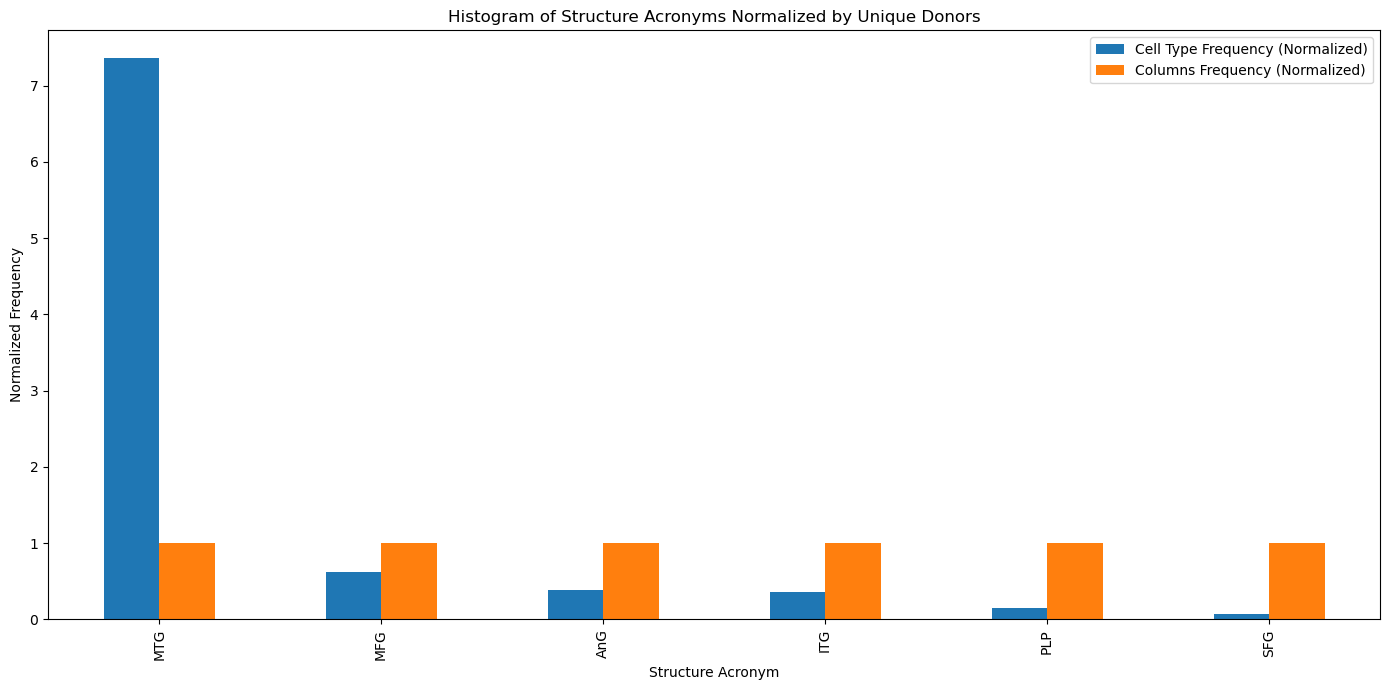

,Cell Types Donor Count,Columns Donor Count
0,42,6


In [34]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Count unique donor names in both datasets
cell_type_donor_count = data["donor__name"].nunique()
columns_donor_count = columns_df["donor_name"].nunique()

# Combine both counts into a frequency dictionary with normalization by donor count
acronym_frequencies = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_frequencies[acronym] = {
            "Cell Type Frequency (Normalized)": cell_count / cell_type_donor_count,
            "Columns Frequency (Normalized)": column_count / columns_donor_count
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_frequencies, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"], ascending=False)

# Display the frequencies as a table
display(acronym_df)

# Plot normalized frequency histogram
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of Structure Acronyms Normalized by Unique Donors")
plt.xticks(rotation=90)
plt.legend(["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"])
plt.tight_layout()
plt.show()

# Display donor counts
donor_counts = {
    "Cell Types Donor Count": cell_type_donor_count,
    "Columns Donor Count": columns_donor_count
}
display(pd.DataFrame([donor_counts]))


## Conclusion & Discussion

*Fill in your discussion information here*